In [15]:
from pyuvdata import UVData
import numpy as np
import matplotlib.pyplot as plt

uv = UVData()

# 48015
uv.read_uvh5('zen.2459122.48015.mini.sum.uvh5')
data48015 = uv.data_array
print(np.shape(data48015))
print(len(uv.antenna_numbers))
# Antennas w/ visibilites are stored in ant_1_array & ant_2_array
print(len(set(uv.ant_1_array).union(set(uv.ant_2_array))))

# 62018
uv.read_uvh5('zen.2459122.62018.mini.sum.uvh5')
data62018 = uv.data_array
print(np.shape(data62018))
print(len(uv.antenna_numbers))
# Antennas w/ visibilites are stored in ant_1_array & ant_2_array
print(len(set(uv.ant_1_array).union(set(uv.ant_2_array))))

# 34011
uv.read_uvh5('zen.2459122.34011.mini.sum.uvh5')
data34011 = uv.data_array
print(np.shape(data34011))
print(len(uv.antenna_numbers))
# Antennas w/ visibilites are stored in ant_1_array & ant_2_array
print(len(set(uv.ant_1_array).union(set(uv.ant_2_array))))

(13320, 1, 1536, 1)
104
36
(13320, 1, 1536, 1)
104
36
(13320, 1, 1536, 1)
104
36


Questions

a) Each file has 104 antennas

b) Each file has 36 antennas w/ visibilities associated w/ them

c) We can see from the code below that the number of baselines is consistent. The shape code simply checks the first dimension of the data array wherein it correponds to the baselines in the observation. When we check for each unique pair of antennas, it gives us a specific physical separation, which is basically the same as calculating the total number of visibilities that is done for the data_array

In [16]:
# Baseline calculation
visibilities = set(uv.ant_1_array).union(set(uv.ant_2_array))
baselines = 0
# Iteration over each baseline & obtaining antenna numbers corresponding to those baselines
for i in uv.baseline_array:
    ant1, ant2 = uv.baseline_to_antnums(i)
    # Only counts if within visibilities
    if ant1 in visibilities and ant2 in visibilities:
        baselines += 1
print(f'Calculated baselines from visibilities: {baselines}')
print(f'Number of baselines * times: {uv.data_array.shape[0]}')

Calculated baselines from visibilities: 13320
Number of baselines * times: 13320


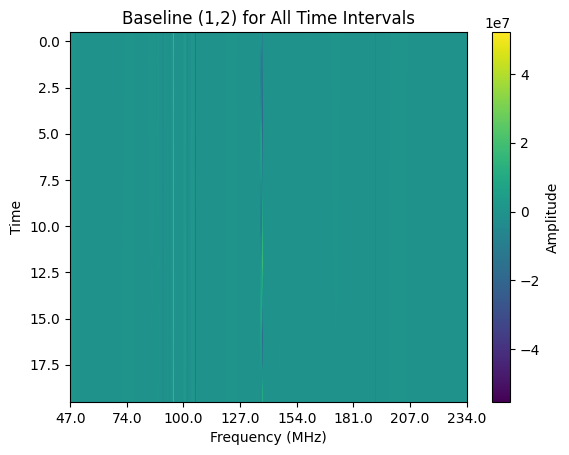

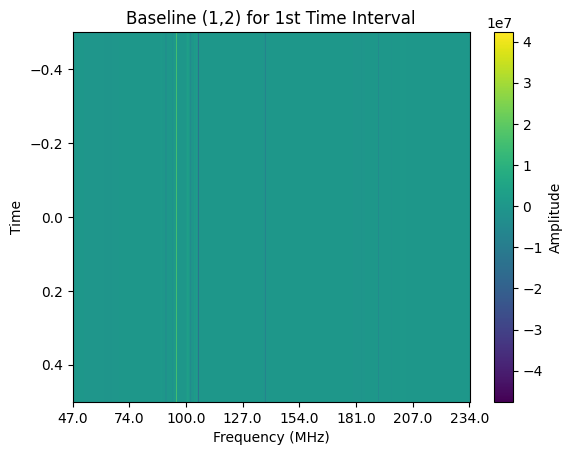

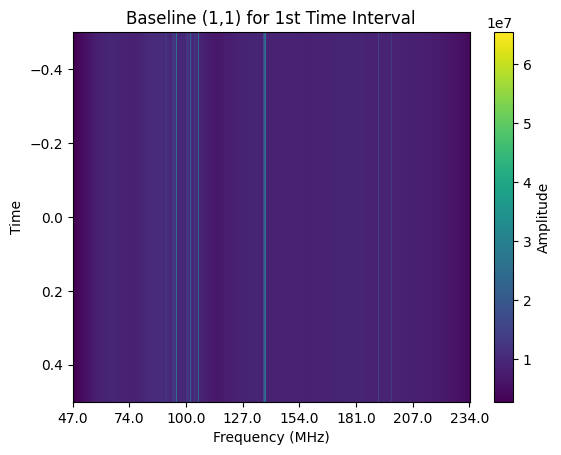

In [17]:
# Waterfall plots
data = uv.get_data(1,2)

def waterfall(data,title):
    # Displays data as a 2D colored image
    plt.imshow(data.real,aspect='auto')
    plt.colorbar(label='Amplitude')
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Time')
    # Setting y-labels to go in MHz
    freqs = uv.freq_array[0]*1e-6
    xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
    xticklabels = np.around(freqs[xticks],0)
    plt.xticks(ticks=xticks,labels=xticklabels)
    plt.title(title)
    plt.show()
# All 20 time intervals
waterfall(data, 'Baseline (1,2) for All Time Intervals')

# Same baseline, first time interval
waterfall(data[:1], 'Baseline (1,2) for 1st Time Interval')

# Baseline of (1,1), first time interval
data = uv.get_data(1,1)
waterfall(data[:1], 'Baseline (1,1) for 1st Time Interval')

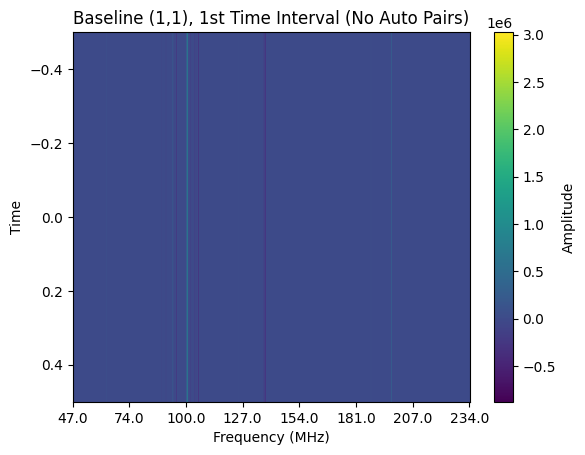

In [58]:
# Question g
def mean_amp(time_slice):
    kept_pairs = []
    antennas = uv.get_ants()

    # Auto correlation pair removal
    for i in range(len(antennas)):
        for j in range(i+1,len(antennas)):
            # Keep non auto correlation pairs
            ant1 = antennas[i]
            ant2 = antennas[j]
            data_pair = uv.get_data(ant1,ant2)[time_slice]
            kept_pairs.append(data_pair)
            mean_data = np.mean(kept_pairs, axis=0)
    return mean_data
waterfall(mean_amp(1).reshape(1,-1), 'Baseline (1,1), 1st Time Interval (No Auto Pairs)')

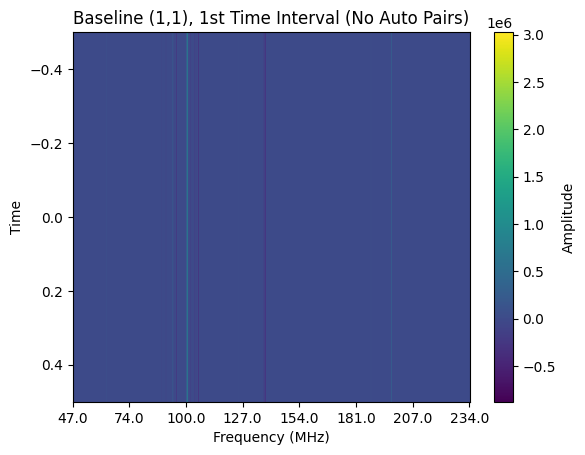

In [ ]:
# Question g
def mean_amp(time_slice):
    kept_pairs = []
    antennas = uv.get_ants()

    # Auto correlation pair removal
    for i in range(len(antennas)):
        for j in range(i+1,len(antennas)):
            # Keep non auto correlation pairs
            ant1 = antennas[i]
            ant2 = antennas[j]
            data_pair = uv.get_data(ant1,ant2)[time_slice]
            kept_pairs.append(data_pair)
            mean_data = np.mean(kept_pairs, axis=0)
    return mean_data
waterfall(mean_amp(1).reshape(1,-1), 'Baseline (1,1), 1st Time Interval (No Auto Pairs)')

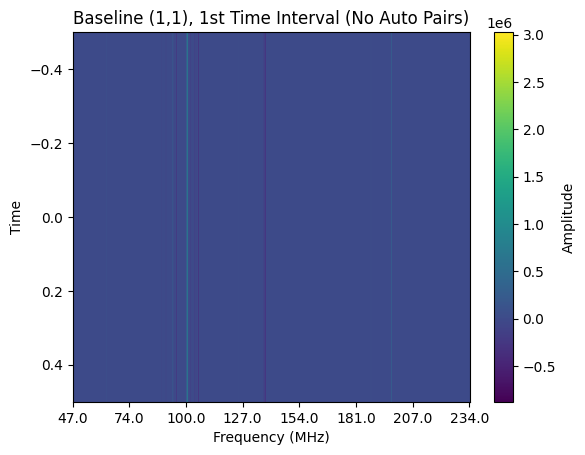

In [ ]:
# Question g
def mean_amp(time_slice):
    kept_pairs = []
    antennas = uv.get_ants()

    # Auto correlation pair removal
    for i in range(len(antennas)):
        for j in range(i+1,len(antennas)):
            # Keep non auto correlation pairs
            ant1 = antennas[i]
            ant2 = antennas[j]
            data_pair = uv.get_data(ant1,ant2)[time_slice]
            kept_pairs.append(data_pair)
            mean_data = np.mean(kept_pairs, axis=0)
    return mean_data
waterfall(mean_amp(1).reshape(1,-1), 'Baseline (1,1), 1st Time Interval (No Auto Pairs)')

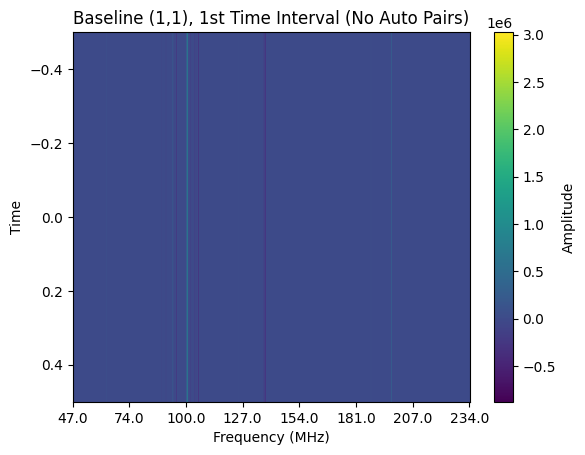

In [ ]:
# Question g
def mean_amp(time_slice):
    kept_pairs = []
    antennas = uv.get_ants()

    # Auto correlation pair removal
    for i in range(len(antennas)):
        for j in range(i+1,len(antennas)):
            # Keep non auto correlation pairs
            ant1 = antennas[i]
            ant2 = antennas[j]
            data_pair = uv.get_data(ant1,ant2)[time_slice]
            kept_pairs.append(data_pair)
            mean_data = np.mean(kept_pairs, axis=0)
    return mean_data
waterfall(mean_amp(1).reshape(1,-1), 'Baseline (1,1), 1st Time Interval (No Auto Pairs)')

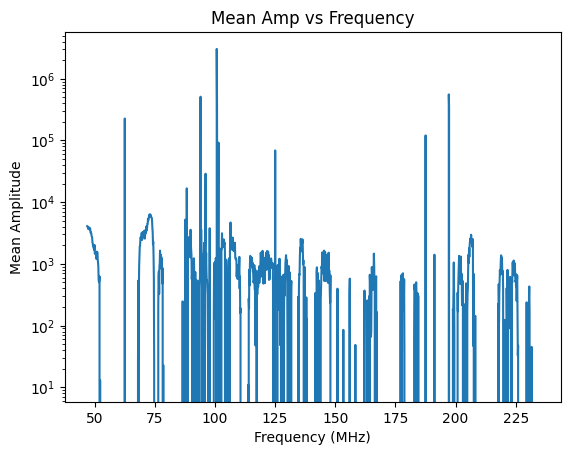

In [59]:
freqs = uv.freq_array[0]*1e-6

# Question h
plt.plot(freqs,mean_amp(0).real)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Mean Amplitude')
plt.title('Mean Amp vs Frequency')
plt.yscale('log')

In [64]:
# Amplitude difference
amp_diff = []
for i in range(1,20):
    diff = mean_amp(i) - mean_amp(i-1)
    amp_diff.append(diff)
print(np.shape(amp_diff))
# Yup, 19

(19, 1536)


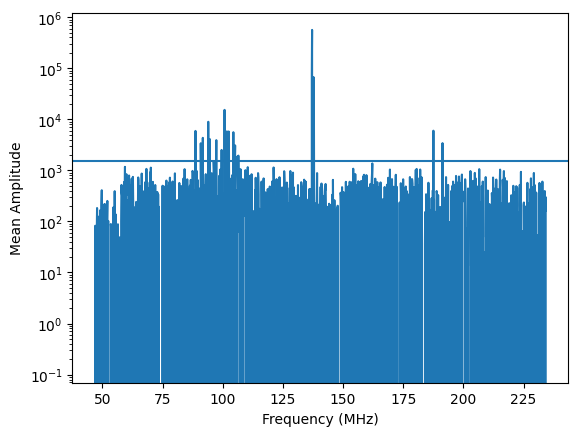

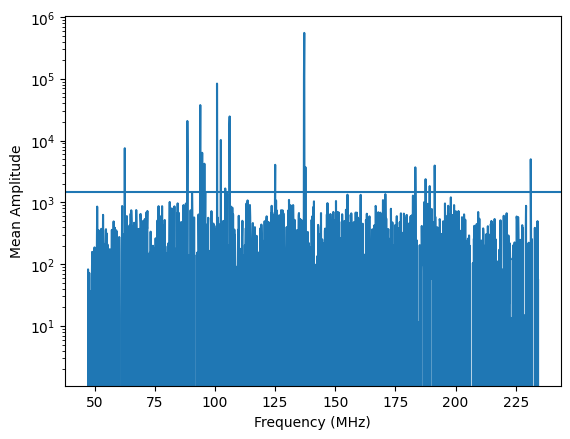

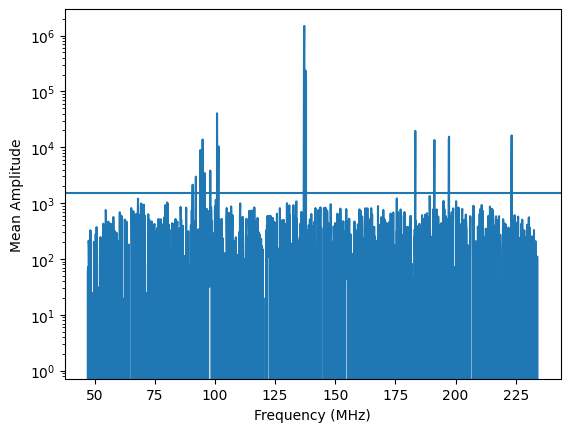

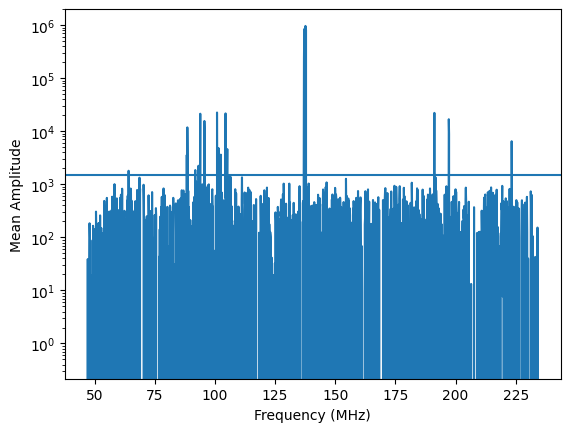

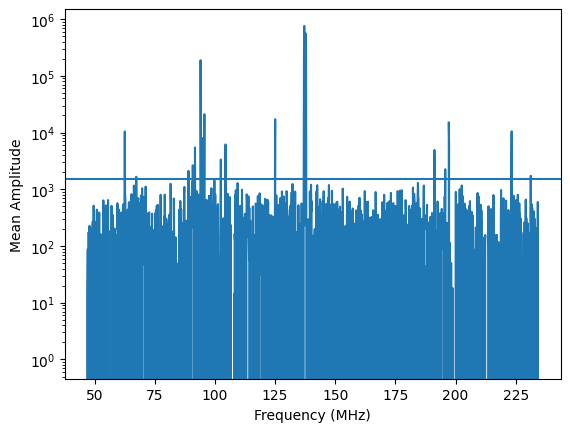

In [70]:
# Random 5 plots
def pltinv(amps,freq):
    plt.plot(freq,amps.real)
    plt.axhline(y=1500) # Random choice to see where cut off should be
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Mean Amplitude')
    plt.yscale('log')
    plt.show()
pltinv(amp_diff[2],freqs)
pltinv(amp_diff[6],freqs)
pltinv(amp_diff[9],freqs)
pltinv(amp_diff[12],freqs)
pltinv(amp_diff[16],freqs)

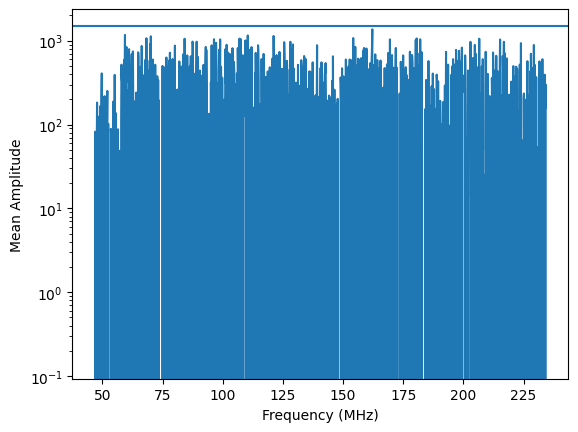

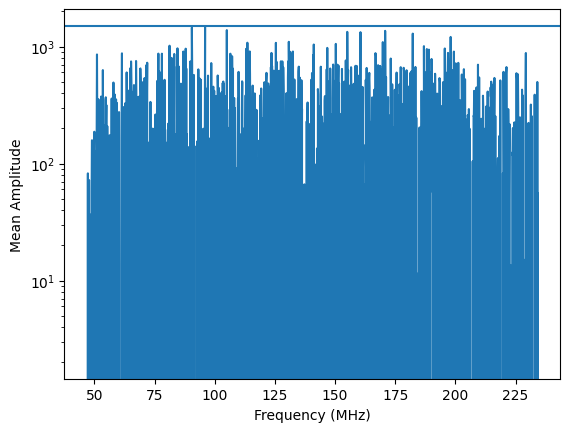

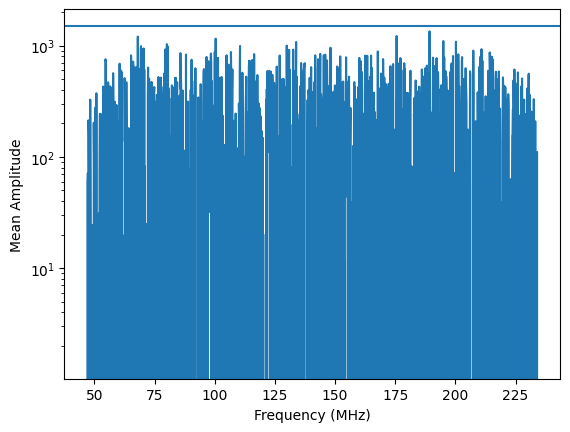

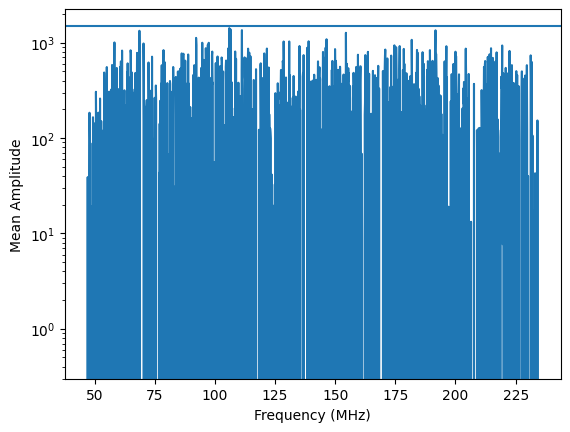

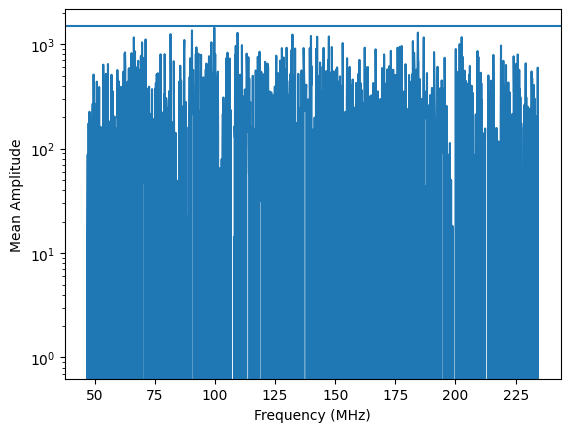

In [71]:
# Cutting & viewing aftermath
filter = []
for i in range(1,20):
    diff = mean_amp(i) - mean_amp(i-1)
    cut = [cut for cut, value in enumerate(diff.real) if value <= 1500]
    filter.append(cut)
pltinv(amp_diff[2][filter[2]],freqs[filter[2]])
pltinv(amp_diff[6][filter[6]],freqs[filter[6]])
pltinv(amp_diff[9][filter[9]],freqs[filter[9]])
pltinv(amp_diff[12][filter[12]],freqs[filter[12]])
pltinv(amp_diff[16][filter[16]],freqs[filter[16]])

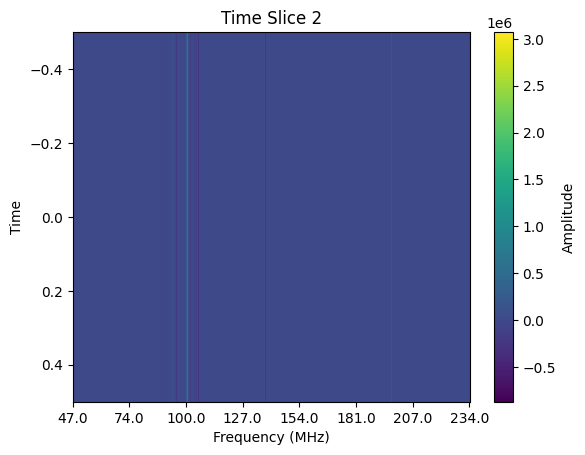

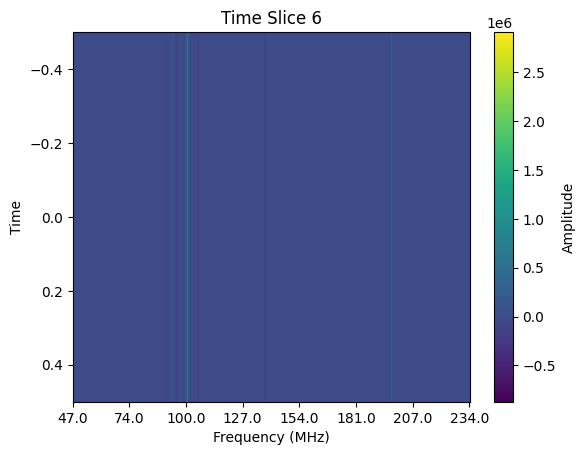

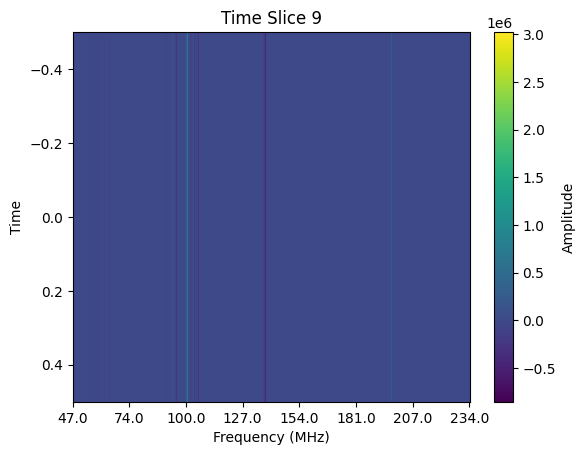

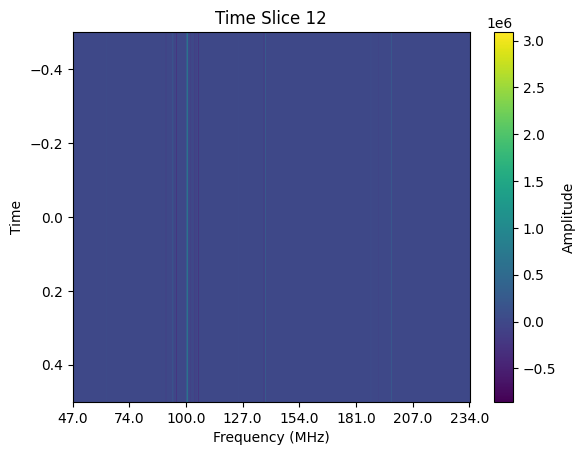

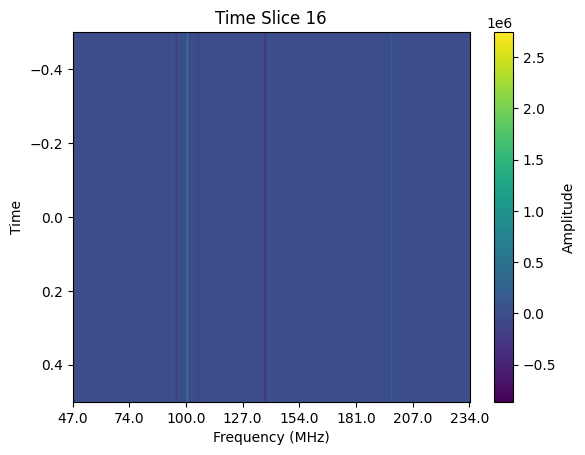

In [72]:
# Waterfall plots before cut
waterfall(mean_amp(2).reshape(1,-1),'Time Slice 2')
waterfall(mean_amp(6).reshape(1,-1),'Time Slice 6')
waterfall(mean_amp(9).reshape(1,-1),'Time Slice 9')
waterfall(mean_amp(12).reshape(1,-1),'Time Slice 12')
waterfall(mean_amp(16).reshape(1,-1),'Time Slice 16')

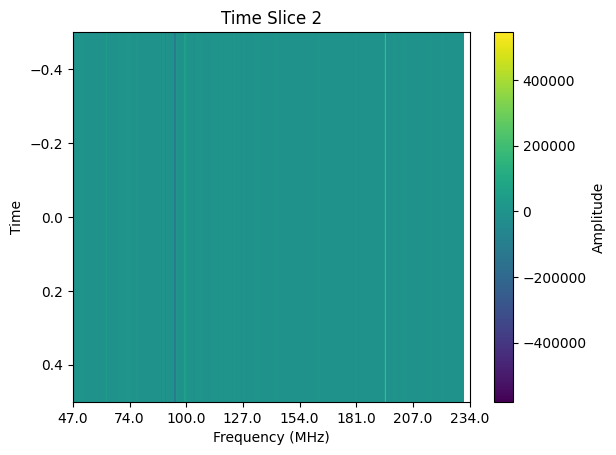

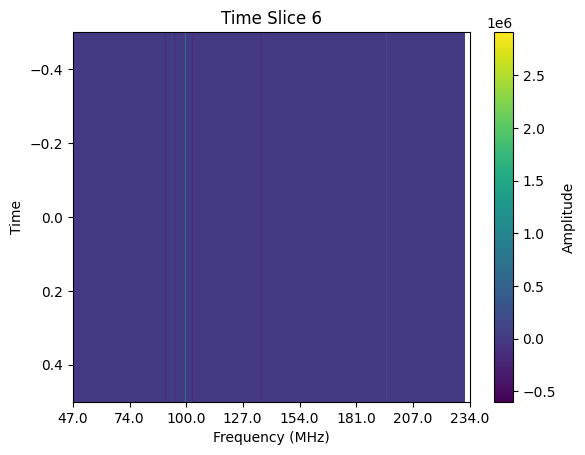

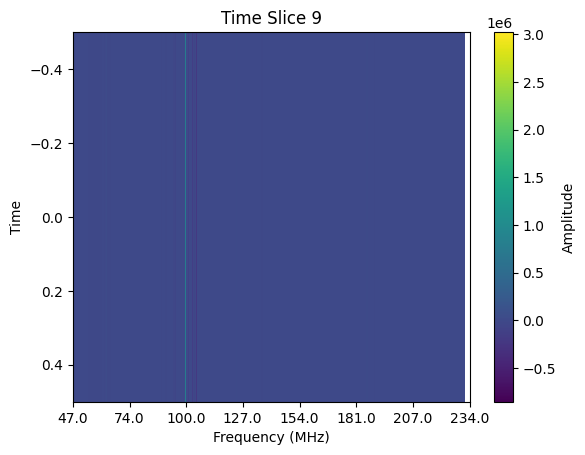

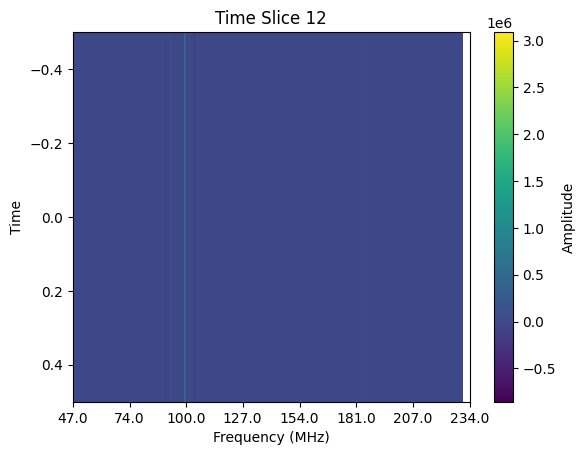

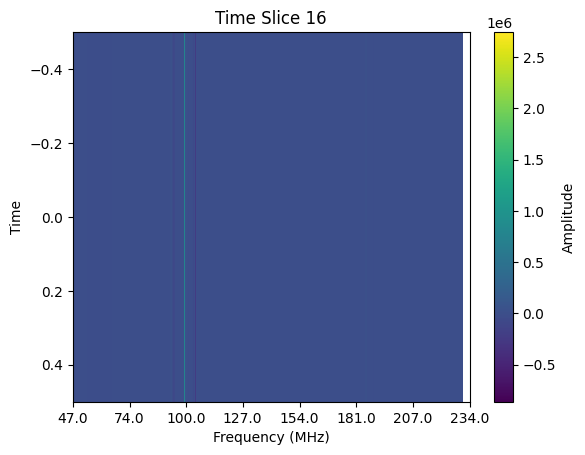

In [73]:
# Waterfall plots after cut
waterfall(mean_amp(2)[filter[2]].reshape(1,-1),'Time Slice 2')
waterfall(mean_amp(6)[filter[6]].reshape(1,-1),'Time Slice 6')
waterfall(mean_amp(9)[filter[9]].reshape(1,-1),'Time Slice 9')
waterfall(mean_amp(12)[filter[12]].reshape(1,-1),'Time Slice 12')
waterfall(mean_amp(16)[filter[16]].reshape(1,-1),'Time Slice 16')

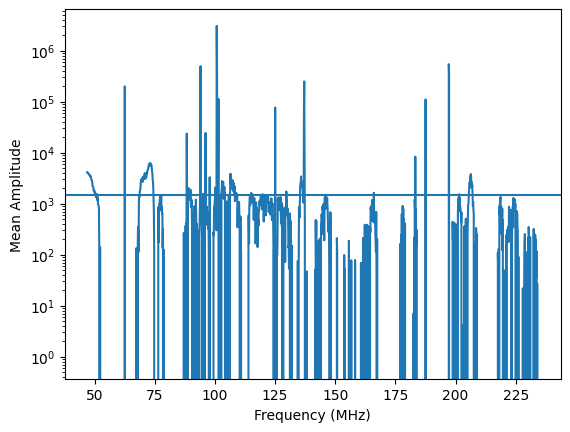

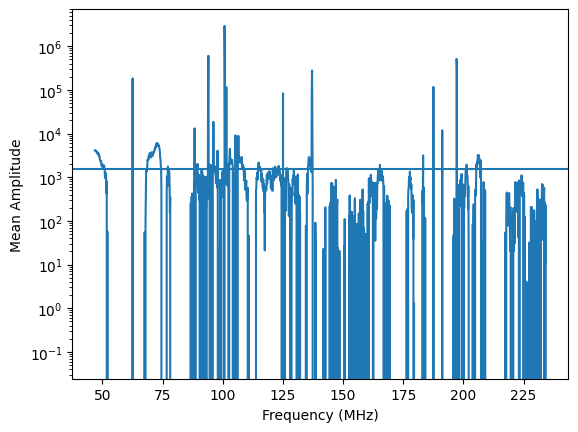

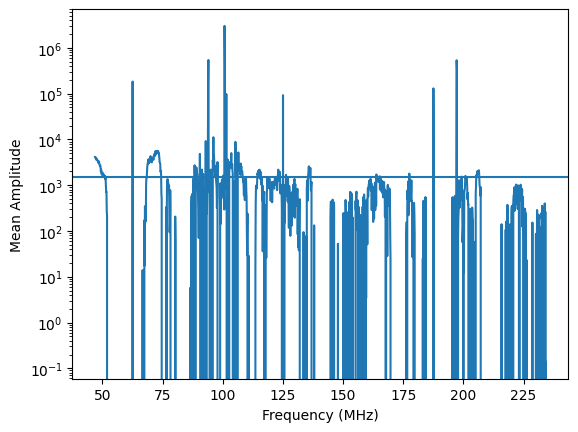

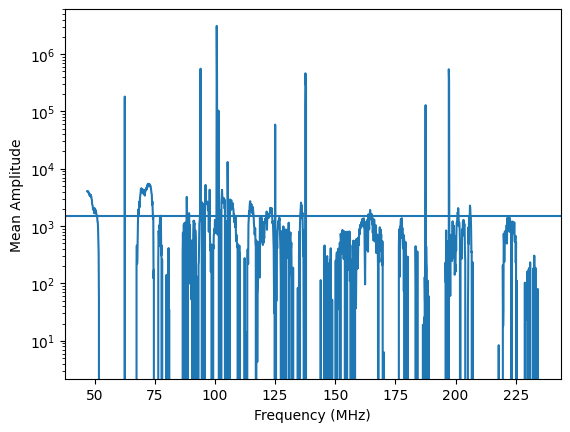

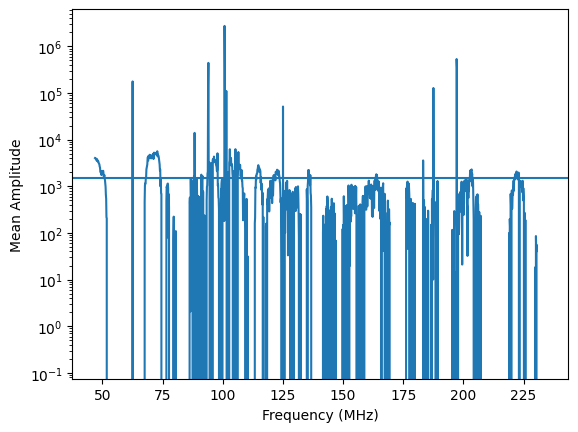

In [74]:
# Amplitude vs freq plots before cut
pltinv(mean_amp(2).real,freqs)
pltinv(mean_amp(6).real,freqs)
pltinv(mean_amp(9).real,freqs)
pltinv(mean_amp(12).real,freqs)
pltinv(mean_amp(16).real,freqs)

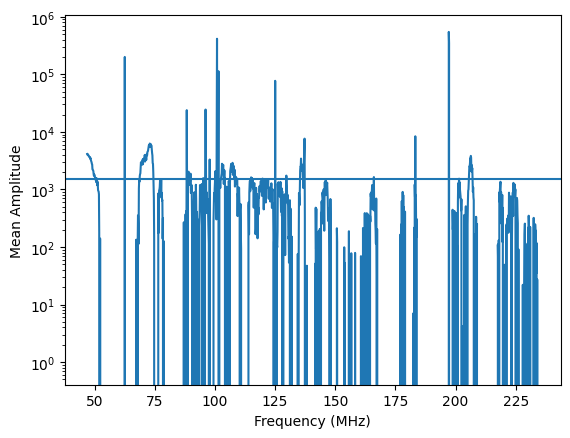

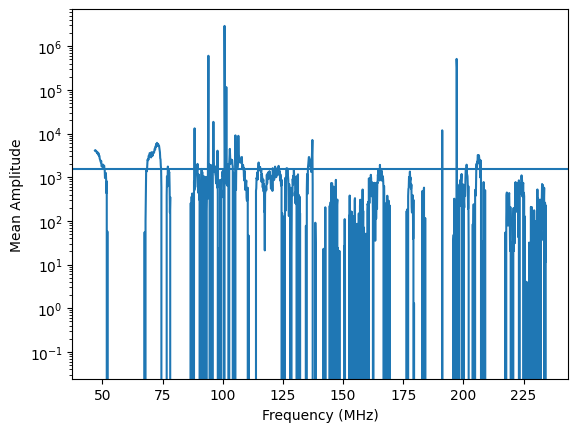

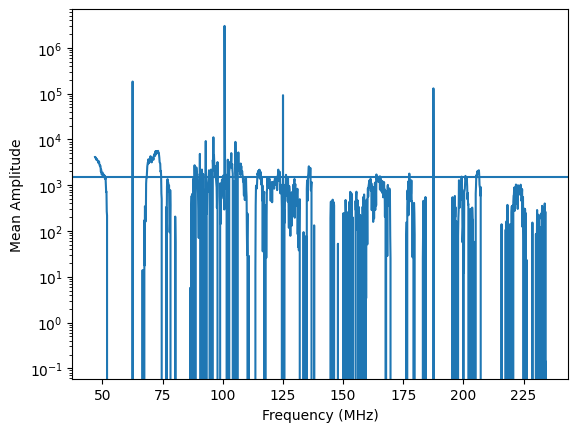

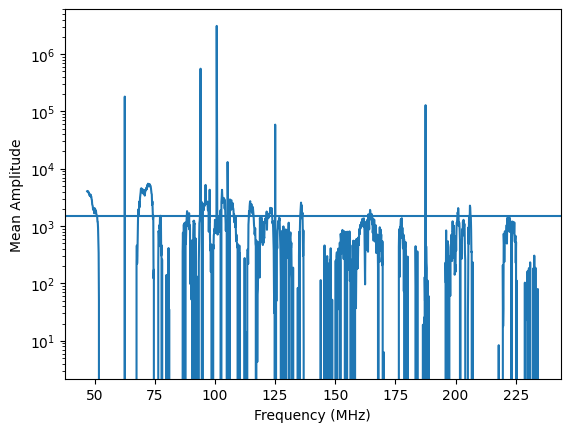

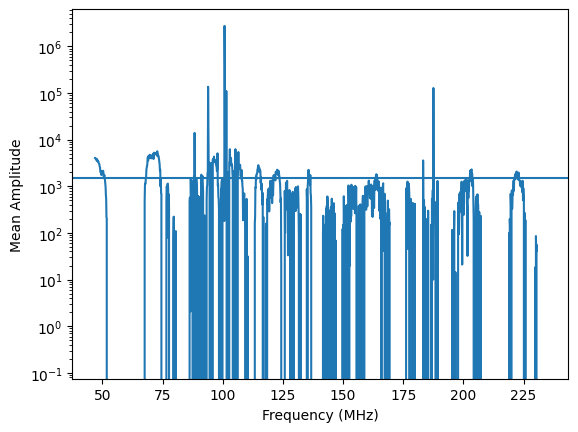

In [76]:
# Amplitude vs freq plots after cut
pltinv(mean_amp(2)[filter[2]].real,freqs[filter[2]])
pltinv(mean_amp(6)[filter[6]].real,freqs[filter[6]])
pltinv(mean_amp(9)[filter[9]].real,freqs[filter[9]])
pltinv(mean_amp(12)[filter[12]].real,freqs[filter[12]])
pltinv(mean_amp(16)[filter[16]].real,freqs[filter[16]])

A lot of the large amplitude frequencies have been removed, but not all of them. The scale in which the cut was done was somewhat larger than the closer precision for the above plots. As a result, amplitudes that were just close enough to the threshold were able to avoid getting cut

6) There are a lot of transformations that can achieve the same result. Some of these include a low-pass filter, or taking a mean/median over time.